In [202]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [204]:
df_sample = pd.read_csv(r'dataset-mini.csv', encoding = 'latin1', low_memory=False)
df_sample.drop('Unnamed: 0', axis=1, inplace = True)

In [205]:
df_sample.head()

,transaction_id,is_fraud,created_at,is_subscription,transaction_type,currency_amount,currency_id,amount_scaled,merchant_customer_id,merchant_customer_email,...,is_secured,ip_country,payment_type,card_id,bank,cardbrand,cardcountry,cardtype,bin,card_exp_relative
0,4166879440771020254,0,2024-04-28 10:35:25.253682787,False,first,832.95,157,660,2a3813121eafd2e0c5d9769a850bbfc98f29296fb66bf7...,7b6ad7577459f69b090aa872f9c814d657f42fd07fcede...,...,False,UKR,#,07dd73f0839f408b08311772147e244c967ed4f11c90cf...,JSC CB Privatbank,VISA,UKR,DEBIT,96da19e3b3b916b909a2b8d8b038e5f5a734e5df5992bd...,76.0
1,13066203640708580959,0,2024-02-21 08:52:56.253682787,True,first,1350.00,157,1081,30ac4234600c1f059693dcb809f3caff4495b0dcce7cc9...,435193ad8757604861da61717fe84f2ebc12f0482be533...,...,False,ESP,#,784eaaaa47767e84f994e2123e901b5b80bf7665ee9538...,CAIXABANK S.A.,VISA,ESP,CREDIT,b3a99f3cc13e6549ff13140928861e8f86538e270f80f1...,61.0
2,18421154072732409661,0,2024-03-01 06:25:53.253682787,True,token,56700.00,141,1343,c842c2e79f15c944127a68307bbe244a0fa2cd4ca0a543...,c403e9eaf852e0b155a4b9f7ffdad1c242e6f702aa3a3e...,...,False,TUR,recurring,b1e5ef9845cc028b56ec58216dcc25eaf69212fa313f0f...,TURKIYE IS BANKASI A.S.,MASTERCARD,TUR,CREDIT,8f6ef449aba940045851a10a251d5d0fb9d1e1dac4d361...,7.0
3,17634729437251154822,0,2024-05-18 15:05:49.253682787,False,first,27000.00,159,507,#,4572961c818ea0a3a03a0783cc980d807c960200ca7646...,...,False,UKR,#,cdc4fcc8d11f303cc658b8f715d741391775e77b567e23...,JSC CB PRIVATBANK,VISA,UKR,DEBIT,734d0b205672bb054b4e622fb94eee60fce6d86295847c...,42.0
4,5213699340225781479,0,2024-04-10 20:47:45.253682787,True,first,135.00,122,100,5a31e62e36b245f4e6a707e4a314b9f09fb40626a47910...,b26f83c48d8cb3d6a34db7cf98d304d35cdeac9342fe00...,...,False,PRY,#,d5d4a363cc8b6daa20b7fe12589702a56df4bd10cd7595...,"BANCARD, S.A.",MASTERCARD,PRY,CREDIT,9ed6069def7ad1ac1b3fdb4875f3bcea1b4a84bbc7e2a9...,47.0


In [206]:
df_sample.nunique()

transaction_id             545804
is_fraud                        2
created_at                 531551
is_subscription                 2
transaction_type                3
currency_amount             16355
currency_id                    93
amount_scaled               12066
merchant_customer_id       430306
merchant_customer_email    449358
merchant_country              231
merchant_language             115
ip_address                 407160
platform                        7
merchant_id                   230
merchant_shop_id             1071
merchant_shop_name           1071
is_secured                      2
ip_country                    230
payment_type                    7
card_id                    410160
bank                         7002
cardbrand                      15
cardcountry                   198
cardtype                        7
bin                         22279
card_exp_relative             223
dtype: int64

In [207]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545804 entries, 0 to 545803
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           545804 non-null  uint64 
 1   is_fraud                 545804 non-null  int64  
 2   created_at               545804 non-null  object 
 3   is_subscription          545804 non-null  bool   
 4   transaction_type         545804 non-null  object 
 5   currency_amount          545804 non-null  float64
 6   currency_id              545804 non-null  int64  
 7   amount_scaled            545804 non-null  int64  
 8   merchant_customer_id     545804 non-null  object 
 9   merchant_customer_email  545804 non-null  object 
 10  merchant_country         545804 non-null  object 
 11  merchant_language        545804 non-null  object 
 12  ip_address               545804 non-null  object 
 13  platform                 545804 non-null  object 
 14  merc

In [208]:
categ_features = df_sample.select_dtypes(include = ['object']).columns.to_list()

In [209]:
df_categorical = df_sample[categ_features]
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545804 entries, 0 to 545803
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   created_at               545804 non-null  object
 1   transaction_type         545804 non-null  object
 2   merchant_customer_id     545804 non-null  object
 3   merchant_customer_email  545804 non-null  object
 4   merchant_country         545804 non-null  object
 5   merchant_language        545804 non-null  object
 6   ip_address               545804 non-null  object
 7   platform                 545804 non-null  object
 8   merchant_shop_name       545804 non-null  object
 9   ip_country               545804 non-null  object
 10  payment_type             545804 non-null  object
 11  card_id                  545804 non-null  object
 12  bank                     545804 non-null  object
 13  cardbrand                545804 non-null  object
 14  cardcountry         

## Preprocessing the date

In [210]:
df_categorical['created_at'] = pd.to_datetime(df_categorical['created_at'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\853512174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['created_at'] = pd.to_datetime(df_categorical['created_at'])


In [211]:
# the year is the same in every row
df_categorical['month_creating'] = df_categorical['created_at'].dt.month
df_categorical['week_day_creating'] = df_categorical['created_at'].dt.dayofweek

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\523189222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['month_creating'] = df_categorical['created_at'].dt.month
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\523189222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['week_day_creating'] = df_categorical['created_at'].dt.dayofweek


In [212]:
df_categorical.drop('created_at', axis=1, inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\1377395916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop('created_at', axis=1, inplace = True)


## Some analysis before balancing

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
categ_features = df_categorical.select_dtypes(include = ['object']).columns.to_list()
for feat in categ_features:
    encoder = LabelEncoder()
    df_categorical[feat] = encoder.fit_transform(df_categorical[feat])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\201905360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[feat] = encoder.fit_transform(df_categorical[feat])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\201905360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[feat] = encoder.fit_transform(df_categorical[feat])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\201905360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [216]:
df_concat = pd.concat([df_categorical, df_sample.drop(df_categorical.columns.to_list()[:-2], axis=1)], axis=1)

In [217]:
df_concat.drop('created_at', axis=1, inplace=True)

In [218]:
full_corr = df_concat.corr()

<Axes: >

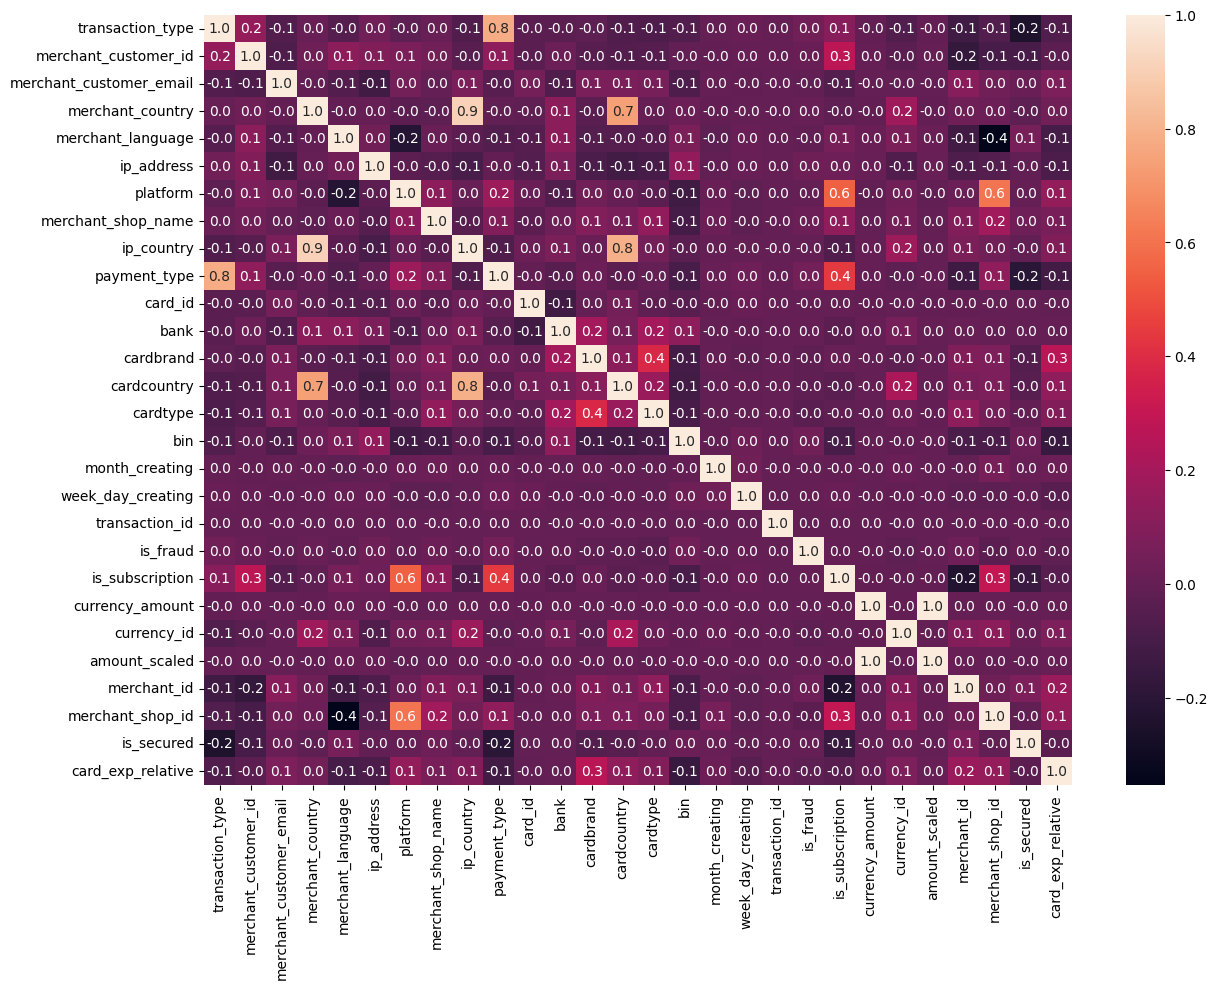

In [219]:
plt.figure(figsize = (14, 10))
sns.heatmap(full_corr, annot = True, fmt = '.1f')


## Unbalanced categories with some visualization

In [220]:
categ_features = df_sample.select_dtypes(include = ['object']).columns.to_list()
df_categorical = df_sample[categ_features]

<Axes: xlabel='merchant_country', ylabel='count'>

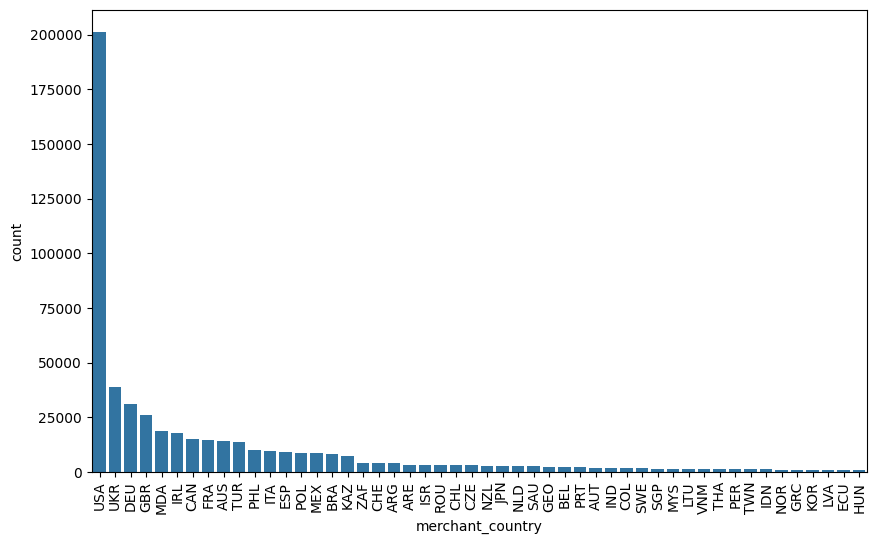

In [221]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=90)
sns.barplot(data = df_categorical['merchant_country'].value_counts().head(50))


In [222]:
df_categorical['merchant_language'] = df_categorical['merchant_language'].apply(lambda lang: lang.split('_')[0].lower())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\1052233349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['merchant_language'] = df_categorical['merchant_language'].apply(lambda lang: lang.split('_')[0].lower())


<Axes: xlabel='merchant_language', ylabel='count'>

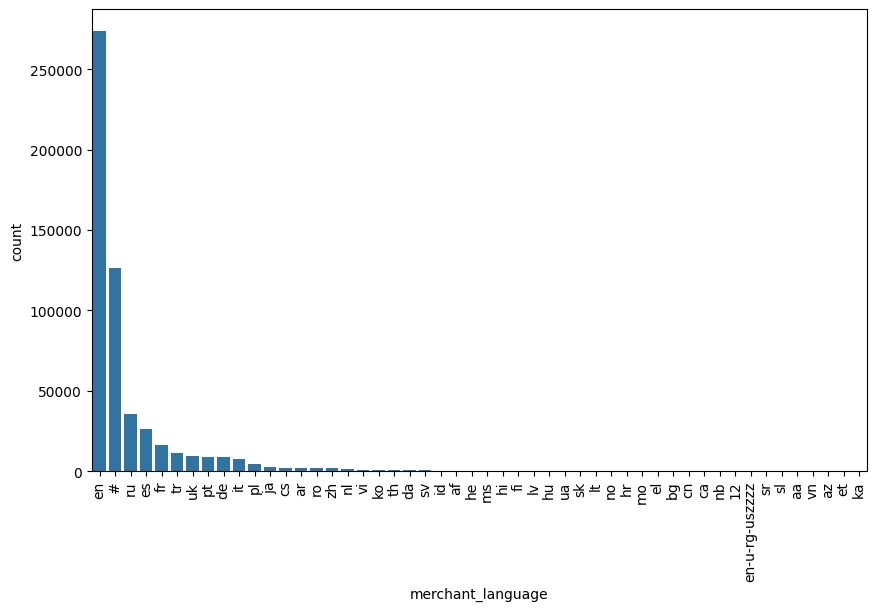

In [223]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=90)
sns.barplot(data = df_categorical['merchant_language'].value_counts().head(50))

<Axes: xlabel='platform', ylabel='count'>

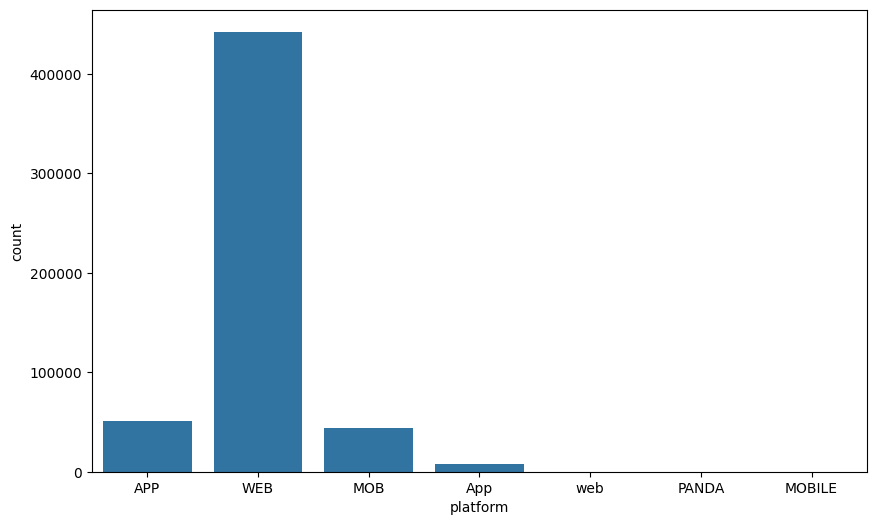

In [224]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df_categorical, x = 'platform')

<Axes: xlabel='bank', ylabel='count'>

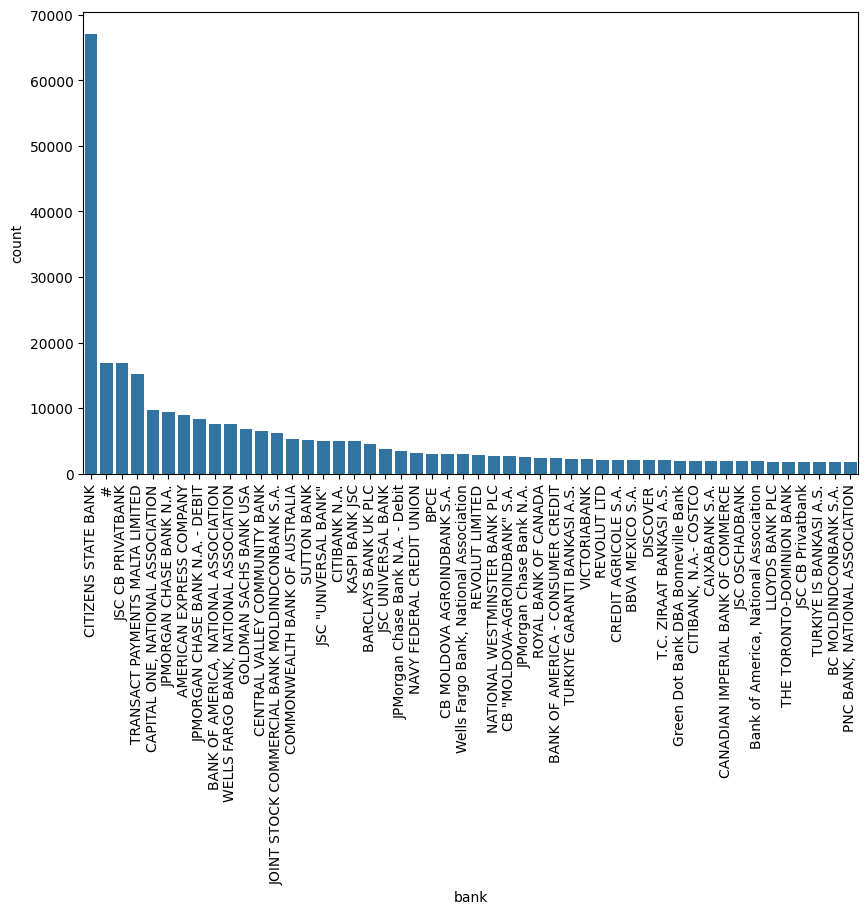

In [225]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=90)
sns.barplot(data = df_categorical['bank'].value_counts().head(50))

<Axes: xlabel='cardbrand', ylabel='count'>

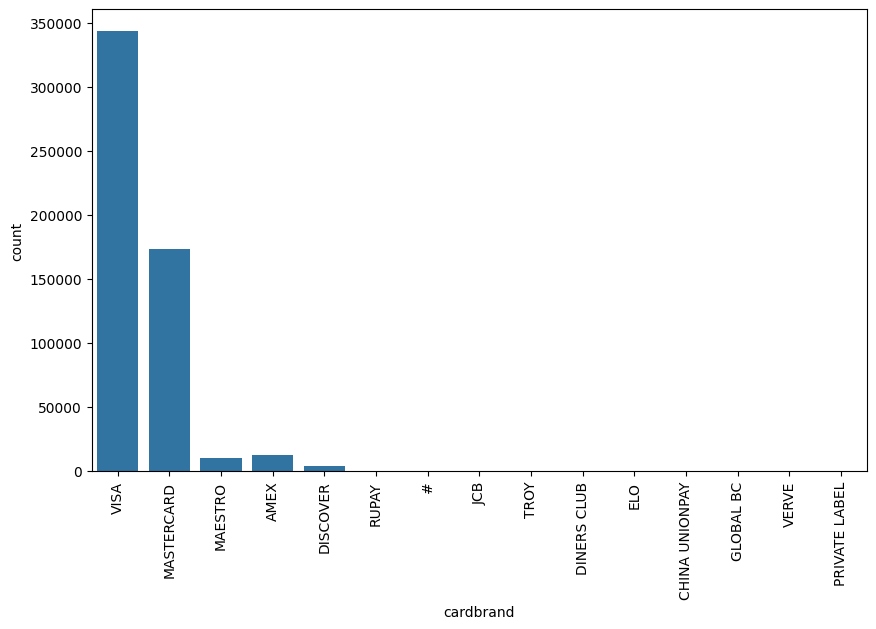

In [226]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=90)
sns.countplot(data = df_categorical, x = 'cardbrand')

<Axes: xlabel='cardcountry', ylabel='count'>

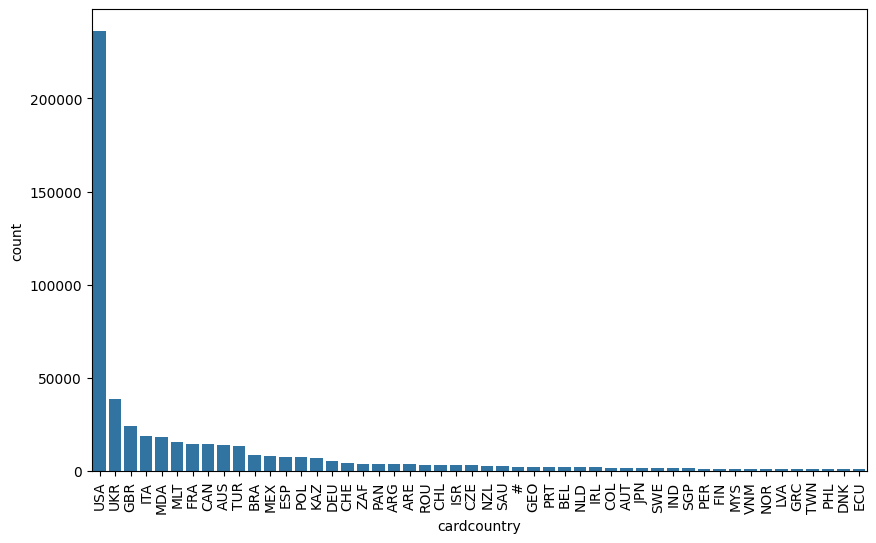

In [227]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=90)
sns.barplot(data = df_categorical['cardcountry'].value_counts().head(50))

<Axes: xlabel='ip_country', ylabel='count'>

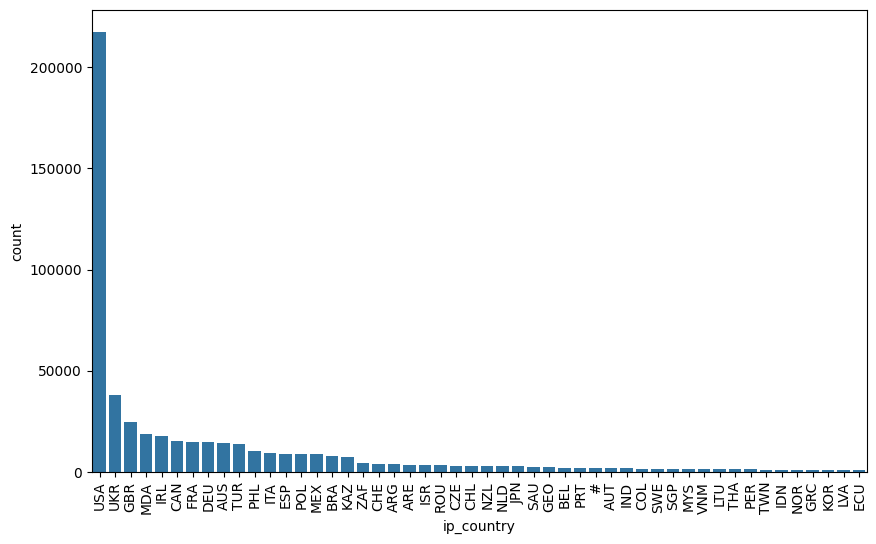

In [228]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=90)
sns.barplot(data = df_categorical['ip_country'].value_counts().head(50))

In [229]:
unbalanced_categories = ['merchant_country', 'merchant_language', 'ip_country', 'platform', 'cardbrand', 'cardcountry']

In [230]:
length = len(df_categorical)
for categ in unbalanced_categories:
    category_counts = df_categorical[categ].value_counts()
    df_categorical[categ] = df_categorical[categ].apply(lambda value: value if category_counts[value] > 0.0001*length else 'other')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\1151652007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[categ] = df_categorical[categ].apply(lambda value: value if category_counts[value] > 0.0001*length else 'other')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\1151652007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[categ] = df_categorical[categ].apply(lambda value: value if category_counts[value] > 0.0001*length else 'other')
C:\Users\Lenovo\AppData\Loca

## LabelEncoding

In [231]:
categ_features = df_categorical.select_dtypes(include = ['object']).columns.to_list()

In [232]:
for feat in categ_features:
    encoder = LabelEncoder()
    df_categorical[feat] = encoder.fit_transform(df_categorical[feat])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\3440858064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[feat] = encoder.fit_transform(df_categorical[feat])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\3440858064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[feat] = encoder.fit_transform(df_categorical[feat])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12788\3440858064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [233]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545804 entries, 0 to 545803
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   created_at               545804 non-null  int32
 1   transaction_type         545804 non-null  int32
 2   merchant_customer_id     545804 non-null  int32
 3   merchant_customer_email  545804 non-null  int32
 4   merchant_country         545804 non-null  int32
 5   merchant_language        545804 non-null  int32
 6   ip_address               545804 non-null  int32
 7   platform                 545804 non-null  int32
 8   merchant_shop_name       545804 non-null  int32
 9   ip_country               545804 non-null  int32
 10  payment_type             545804 non-null  int32
 11  card_id                  545804 non-null  int32
 12  bank                     545804 non-null  int32
 13  cardbrand                545804 non-null  int32
 14  cardcountry              545804 non-

In [234]:
df_concat = pd.concat([df_categorical, df_sample.drop(df_categorical.columns.to_list(), axis=1)], axis=1)

In [235]:
df_concat.drop('created_at', axis=1, inplace=True)

In [236]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545804 entries, 0 to 545803
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_type         545804 non-null  int32  
 1   merchant_customer_id     545804 non-null  int32  
 2   merchant_customer_email  545804 non-null  int32  
 3   merchant_country         545804 non-null  int32  
 4   merchant_language        545804 non-null  int32  
 5   ip_address               545804 non-null  int32  
 6   platform                 545804 non-null  int32  
 7   merchant_shop_name       545804 non-null  int32  
 8   ip_country               545804 non-null  int32  
 9   payment_type             545804 non-null  int32  
 10  card_id                  545804 non-null  int32  
 11  bank                     545804 non-null  int32  
 12  cardbrand                545804 non-null  int32  
 13  cardcountry              545804 non-null  int32  
 14  card

In [237]:
df_categorical.to_csv('encoded_features.csv', index=False)

In [238]:
df_concat.to_csv('encoded_features_with_num.csv', index=False)